In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("/content/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
df.shape

(150, 6)

In [7]:
df.drop("Id",axis=1,inplace=True)

Text(0, 0.5, 'Frequency')

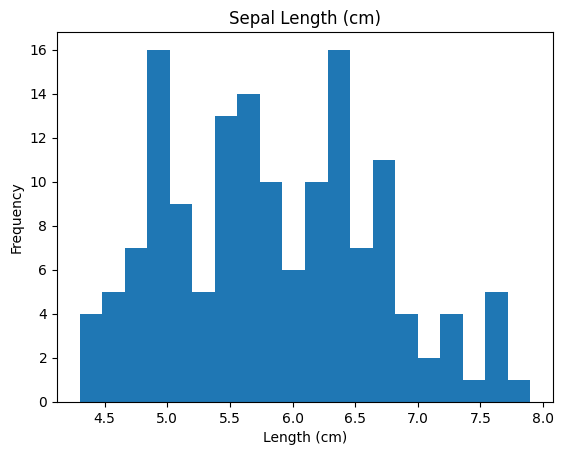

In [8]:
plt.hist(df['SepalLengthCm'], bins=20)
plt.title('Sepal Length (cm)')
plt.xlabel('Length (cm)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

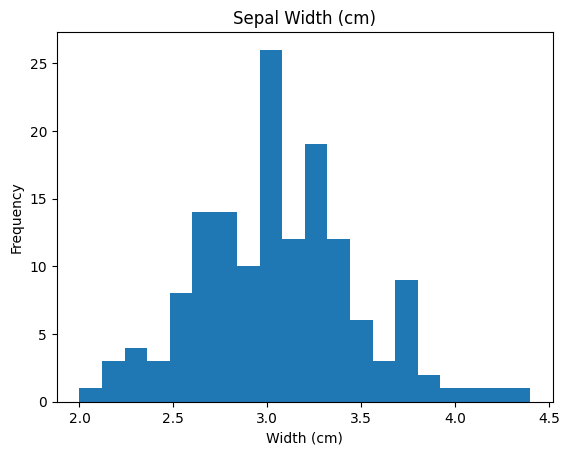

In [9]:
plt.hist(df['SepalWidthCm'], bins=20)
plt.title('Sepal Width (cm)')
plt.xlabel('Width (cm)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

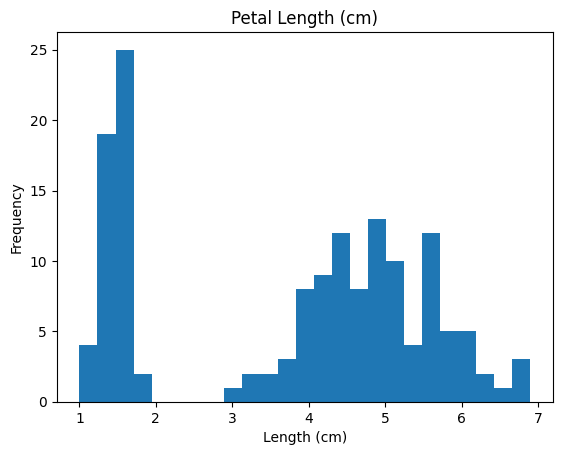

In [10]:
plt.hist(df['PetalLengthCm'], bins=25)
plt.title('Petal Length (cm)')
plt.xlabel('Length (cm)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

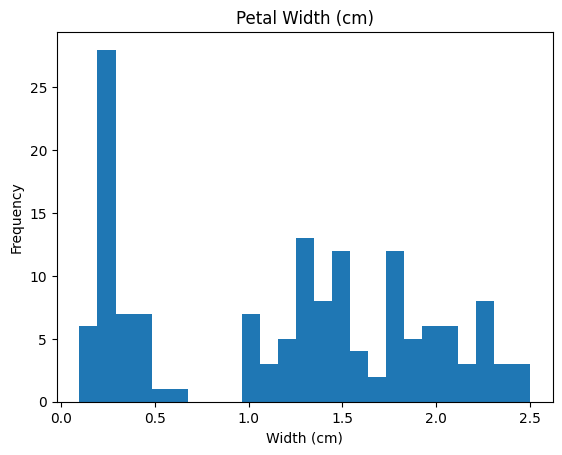

In [11]:
plt.hist(df['PetalWidthCm'], bins=25)
plt.title('Petal Width (cm)')
plt.xlabel('Width (cm)')
plt.ylabel('Frequency')

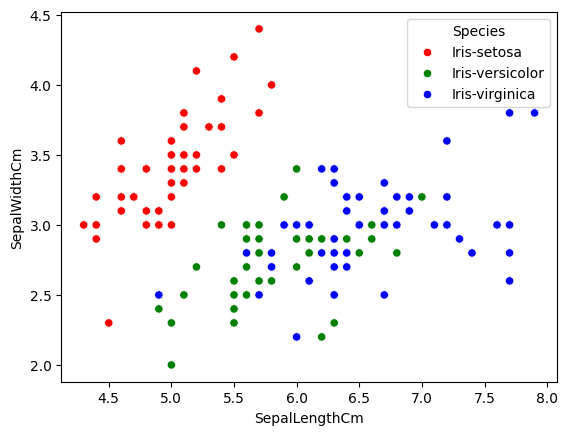

In [12]:
scatter = sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette=['red', 'green', 'blue'])

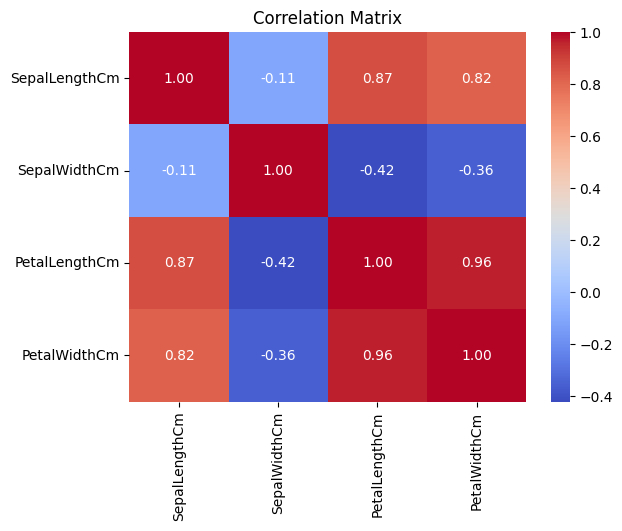

In [13]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [14]:
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

In [15]:
x=df.drop("Species",axis=1)
y=df["Species"]

In [16]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred=model.predict(x_test)


In [29]:
print(f"accuracy score is {accuracy_score(y_test,y_pred)*100}")

accuracy score is 100.0


In [21]:
recall=recall_score(y_test,y_pred,average="weighted")
print(f"recall score is {recall*100}")
precision=precision_score(y_test,y_pred,average="weighted")
print(f"precision score is {precision*100}")
f1=f1_score(y_test,y_pred,average="weighted")
print(f"f1 score is {f1*100}")


recall score is 100.0
precision score is 100.0
f1 score is 100.0


In [24]:
confusion_matrix(y_test,y_pred)



array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [25]:
from sklearn.svm import SVC


In [26]:
svc=SVC( )
svc.fit(x_train,y_train)

SVC()

In [27]:
model.score(x_test,y_test)

1.0

In [31]:
pred=model.predict(x_test)

In [32]:
print(f"accuracy score is {accuracy_score(y_test,pred)*100}")

accuracy score is 100.0
